In [3]:
from pearl_initial_formulation import *

In [1]:
from datastructures.api import (edges_no_param, addobj, addineq, merge, 
setsolvefor, var_params, copy_dicts, OPT)
from datastructures.graphutils import flatten_tree, all_variables, all_edges
from datastructures.tearing import dir_graph, min_arc_set_assign, min_arc_set
from datastructures.operators import reformulate, invert_edges
from datastructures.transformations import transform_components
from datastructures.rendering import render_incidence
from datastructures.runpipeline import model_to_problem
from datastructures.postprocess import print_outputs
import openmdao.api as om

In [4]:
edges, tree = model.generate_formulation()
edges_nopar =  edges_no_param(model, edges)
outset_initial = {comp: var[0] for comp,var in edges[1].items()}

In [7]:
model.components

[(('\\alpha', 'A_{solar}'), 0, ('D_f',), '2.0*(1/(3.14159265358979 - 3.14159265358979*\\alpha))**0.5*Abs(A_{solar})**0.5'),
 (('\\alpha', 'D_f'), 1, ('d',), '\\alpha*D_f'),
 (('h_f', 't_d', 'D_s', 'D_d', 't_s', 'D_f'), 2, ('Vd',), '0.785398163397448*D_d**2*t_d + 0.785398163397448*D_f**2*h_f + 0.785398163397448*D_s**2*t_s'),
 (('\\rho_w', 'g', 'Vd'), 3, ('F_B',), '\\rho_w*g*Vd'),
 (('F_B',), 4, ('F_W',), 'F_B'),
 (('h_f', 'D_s', 't_s', 't_d', 'D_d', 'D_f'), 5, ('K_B',), '(D_d*t_d**2/2 + D_f*h_f*(h_f/2 + t_d + t_s) + D_s*t_s*(t_d + t_s/2))/(D_d*t_d + D_f*h_f + D_s*t_s)'),
 (('t_f', 'D_s', 't_s', 't_d', 'D_d', 'D_f'), 6, ('K_G',), '(D_d*t_d**2/2 + D_f*t_f*(t_d + t_f/2 + t_s) + D_s*t_s*(t_d + t_s/2))/(D_d*t_d + D_f*t_f + D_s*t_s)'),
 (('D_f',), 7, ('I',), '0.0490873852123405*D_f**4'),
 (('Vd', 'I'), 8, ('B_M',), 'I/Vd'),
 (('B_M', 'K_G', 'K_B'), 9, ('G_M',), 'B_M + K_B - K_G'),
 (('\\rho_w', 'g', 'D_f'), 10, ('C_{33}',), '0.785398163397448*\\rho_w*g*D_f**2'),
 (('\\rho_w', 'D_s', 'D_d', 'D

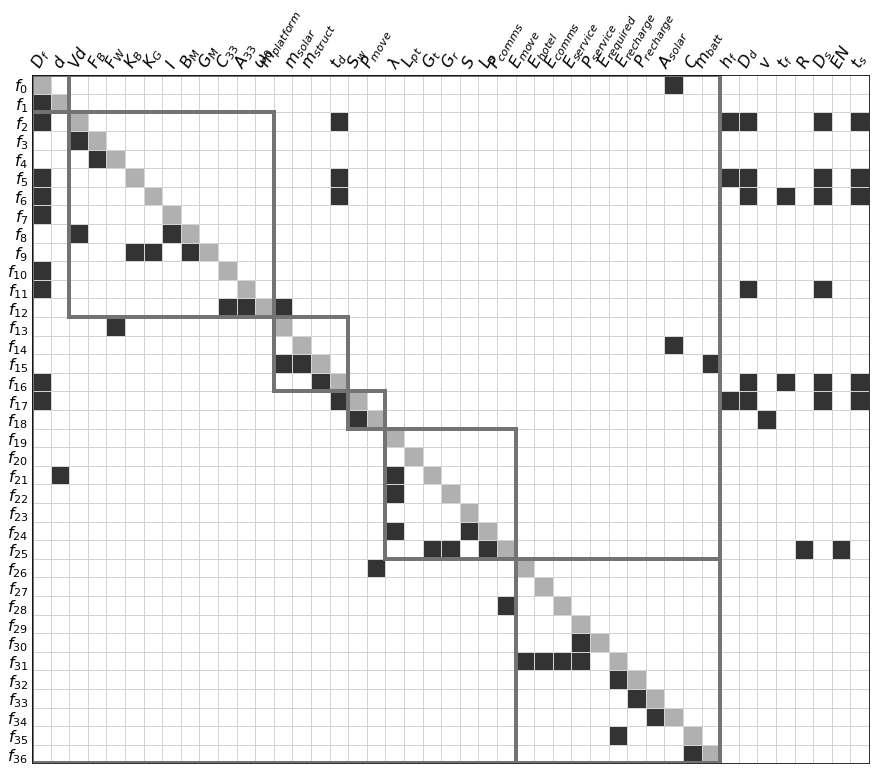

In [6]:
render_incidence(edges_nopar, tree, figname="pearl_default_hsm.png", save=False, rawvarname=True, 
                         dispendcomp=False, hideticks=True, patchwidth=4, figsize=((15,15)));